In [1]:
from chebGreen.greenlearning.utils import DataProcessor
from chebGreen.greenlearning.model import *
import matplotlib.pyplot as plt

%env TF_MLC_LOGGING=1
%env TF_CPP_MIN_LOG_LEVEL=2

env: TF_MLC_LOGGING=1
env: TF_CPP_MIN_LOG_LEVEL=2


In [2]:
data = DataProcessor("datasets/airy_equation/5.00.mat")
data.generateDataset(valRatio = 0.95, batch_size = 128)

Metal device set to: Apple M1 Pro


In [3]:
model = GreenNN()
model.build()

In [4]:
lossHistory = model.train(data, epochs = 3000)

Loss at epoch 99: Training = 2.806E-01, Validation = 3.818E-01
Loss at epoch 199: Training = 3.128E-02, Validation = 2.890E-02
Loss at epoch 299: Training = 8.431E-03, Validation = 6.513E-03
Loss at epoch 399: Training = 4.909E-03, Validation = 4.030E-03
Loss at epoch 499: Training = 3.536E-03, Validation = 3.039E-03
Loss at epoch 599: Training = 2.588E-03, Validation = 2.075E-03
Loss at epoch 699: Training = 2.085E-03, Validation = 1.678E-03
Loss at epoch 799: Training = 1.662E-03, Validation = 1.318E-03
Loss at epoch 899: Training = 1.441E-03, Validation = 1.129E-03
Loss at epoch 999: Training = 1.186E-03, Validation = 9.146E-04
Loss at epoch 1099: Training = 9.926E-04, Validation = 7.470E-04
Loss at epoch 1199: Training = 9.379E-04, Validation = 6.828E-04
Loss at epoch 1299: Training = 7.826E-04, Validation = 5.675E-04
Loss at epoch 1399: Training = 6.747E-04, Validation = 4.763E-04
Loss at epoch 1499: Training = 5.842E-04, Validation = 4.025E-04
Loss at epoch 1599: Training = 5.598

In [5]:
xF, xU = data.xF, data.xU
x, y = np.meshgrid(xU, xF)
G = model.evaluateG(x,y)

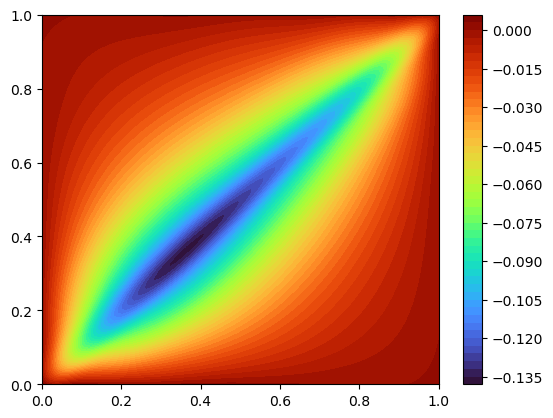

In [6]:
plt.figure()
plt.contourf(x,y,G, 50, cmap = 'turbo', vmin = np.min(G), vmax = np.max(G))
plt.colorbar()

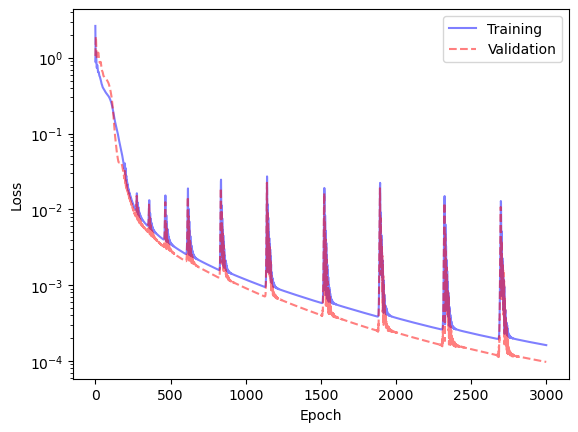

In [7]:
plt.figure()
plt.semilogy(range(len(lossHistory['training'])), lossHistory['training'], 'b', alpha = 0.5)
plt.semilogy(range(len(lossHistory['validation'])), lossHistory['validation'], 'r--', alpha = 0.5)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training','Validation'])

In [8]:
model.saveModels('savedModels/airy_equation-5.00')

INFO:tensorflow:Assets written to: savedModels/airy_equation-5.00/G/assets
INFO:tensorflow:Assets written to: savedModels/airy_equation-5.00/N/assets
